Name: Ali Azak

ID: 191201007

Course: BIL570 /BIL470

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn import metrics
from sklearn.preprocessing import label_binarize


# Exploratory Data Analysis (EDA)
##    EDA kısmı burada gerçekleştirilecektir.

In [2]:
df = pd.read_csv(
    "500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df = df.drop(columns = ['Gender'])
df.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


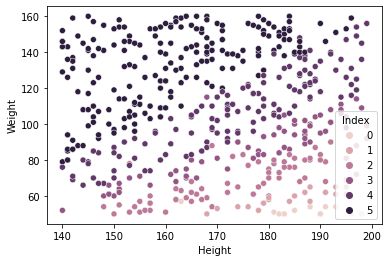

In [4]:
sns.scatterplot(x="Height", y="Weight", data=df, hue="Index")
plt.show()

In [5]:
heightMean = np.mean(df["Height"])
weightMean = np.mean(df["Weight"])
indexMean = np.mean(df["Index"])
heightStdDev = np.std(df["Height"])
weightStdDev = np.std(df["Weight"])
indexStdDev = np.std(df["Index"])
print(heightMean,weightMean,indexMean,"\n",heightStdDev,weightStdDev,indexStdDev)
print("Minimum değerler:\n", df.min(),"\nMaximum değerler:\n",df.max())


169.944 106.0 3.748 
 16.35887722308594 32.350208654659404 1.3536971596335718
Minimum değerler:
 Height    140
Weight     50
Index       0
dtype: int64 
Maximum değerler:
 Height    199
Weight    160
Index       5
dtype: int64


Scatter dağılımını incelediğimizde yüksek boy ve düşük kilonun 0. indexe, yüksek kilo ve düşük boyun 5. indexe eğilimli olduğunu görebiliriz.
0 -> Aşırı zayıf, 5 -> Aşırı obez

## Korelasyon Matrisi

<AxesSubplot:>

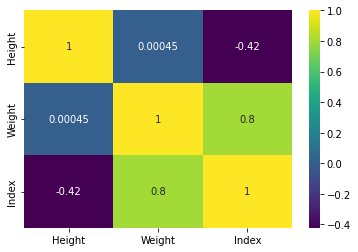

In [6]:
cols = df.corr()
sns.heatmap(cols, annot=True, cmap = 'viridis')

Buradan kilo ve boyun birbiriyle alakası olmadığını ancak ikisinin de index ile korele olduğunu görebiliriz.

# Pairplot
    Burada önceden bahsedilen ilişkiler daha net bir şekilde görülebilmektedir. Burada göze çarpan nokta deneklerin; obez olmaya eğiliminin, zayıf olma eğiliminden daha yüksek olmasıdır.
    

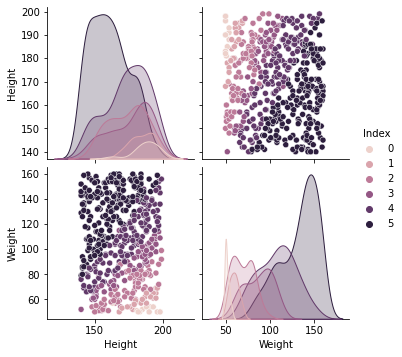

In [7]:
sns.pairplot(df, hue ='Index')

# Training Linear Regression

In [80]:
from linearReg import LinearRegression
model = LinearRegression()
RANDOM_SEED = 0
random.seed(RANDOM_SEED)
dataList = df.values.tolist()
#random.shuffle(dataList) 
x = []
y = []
z = []
for row in dataList:
    x.append(row[0])
    y.append(row[1])
    z.append(row[2])
x_train = x[:250]
x_eval  = x[250:]
y_train = y[:250]
y_eval  = y[250:]
z_train = z[:250]
z_eval  = z[250:]

model.fit(x_train,y_train,z_train)
test_pred = model.predict(x_eval,y_eval)
train_pred = model.predict(x_train,y_train)

## Confusion Matrislerin Çizilmesi

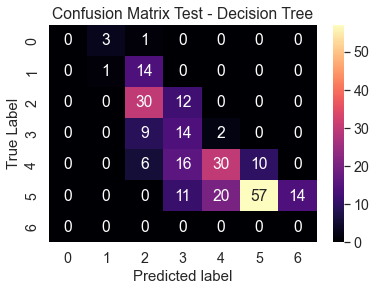

<Figure size 720x504 with 0 Axes>

In [87]:
confusion_matrix_test = metrics.confusion_matrix(z_eval,  

                                            test_pred)

matrix_df = pd.DataFrame(confusion_matrix_test)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix Test - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()


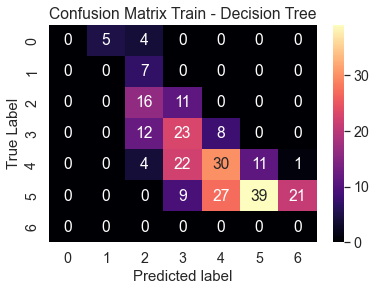

<Figure size 720x504 with 0 Axes>

In [88]:
confusion_matrix_train = metrics.confusion_matrix(z_train,  

                                            train_pred)

matrix_df = pd.DataFrame(confusion_matrix_train)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix Train - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()

Burada confision matrix'ten linear regression patterni görülebiliyor. Köşegenin etrafında tüm tahminler yapılırken, uzak noktalarda yapılan tahmin yok.

## Metriklerin Hesaplanması

In [92]:
testAccuracy = metrics.r2_score(z_eval,test_pred)
trainAccuracy = metrics.r2_score(z_train,train_pred)
print("Train R2 = {} \n Test R2 = {}"
      .format(trainAccuracy,testAccuracy))

Train R2 = 0.5550955182683228 
 Test R2 = 0.6382785423466469


In [93]:
testAccuracy = metrics.mean_squared_error(z_eval,test_pred)
trainAccuracy = metrics.mean_squared_error(z_train,train_pred)
print("Train MSE = {} \n Test MSE = {}"
      .format(trainAccuracy,testAccuracy))

Train MSE = 0.784 
 Test MSE = 0.688


In [94]:
testAccuracy = metrics.mean_absolute_error(z_eval,test_pred)
trainAccuracy = metrics.mean_absolute_error(z_train,train_pred)
print("Train MAE = {} \n Test MAE = {}"
      .format(trainAccuracy,testAccuracy))

Train MAE = 0.64 
 Test MAE = 0.544


## Sonuçların Yorumlanması
R2 , MSE , MAE için hatalar yukarıda hesaplandı. En yüksek başarı MSE ölçütüne göre elde edilirken en düşük başarı MAE için elde edildi. Train başarısının test'ten yüksek olması doğru işlemleri yaptığımızı gösteriyor. Önceki ödevdeki decision tree'ye göre düşük başarı elde etmemizin sebebi linear regressionun daha basit yapısından ve gradyent bazlı öğrenmenin local minimalara hassas olmasından kaynaklanıyor.